In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors
import matplotlib.gridspec as gridspec
from scipy import stats
import pyvinecopulib as pv
from scipy.stats import rankdata

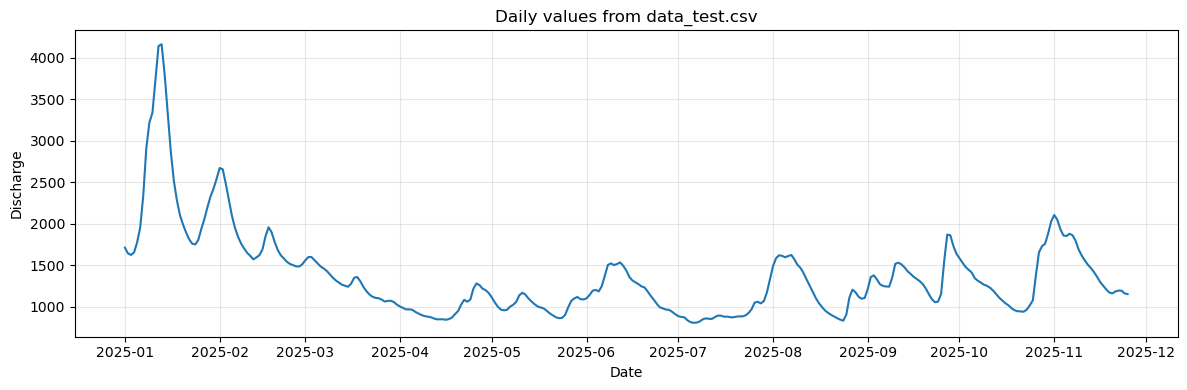

In [ ]:
file_name = 'real_data.csv'
df = pd.read_csv(file_name, sep=';', encoding="latin1")
keys = df.keys()
df["datum"] = pd.to_datetime(df["WAARNEMINGDATUM"],dayfirst=True)
df["waarde"] = pd.to_numeric(df["NUMERIEKEWAARDE"].astype(str).str.replace(",", "."))
df.loc[df["waarde"] > 1e5, "waarde"] = np.nan # remove outliers
df = df.dropna(subset=["datum", "waarde"]) # drop rows with NaN in 'datum' or 'waarde'

daily = df.groupby("datum")["waarde"].mean() # transform to daily mean 

plt.figure(figsize=(12, 4))
plt.plot(daily.index, daily.values)
plt.xlabel("Date")
plt.ylabel("Discharge")
plt.title("Daily values from data_test.csv")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
